# Building RNN with Pytorch

Dans ce TD, nous allons construire un RNN from scratch avec Pytorch, en suivant les étapes suivantes:
1. Sur un problème linéaire, nous allons utiliser les torch optimizers pour trouver le paramètre de régression idéal
2. Sur un problème non-linéaire, nous allons construire un multi-layers perceptron
3. Sur un problème de texte, nous allons construire un modèle RNN

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn

## Optimizers

### Données example
Nous allons construire des données $y = \beta^* X + b$


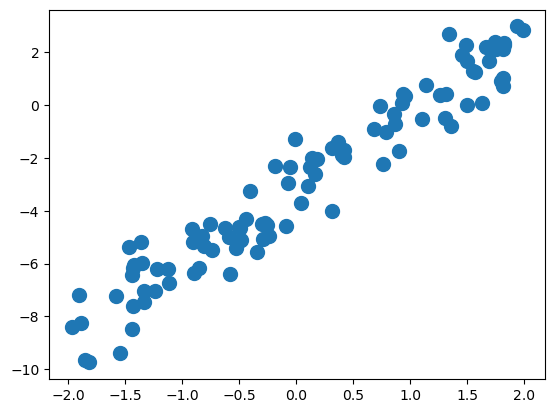

In [3]:
n = 100
    
a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * x + b_star + noise

x = torch.tensor(x, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

### Constuire l'optimizer

- Avec torch.nn.Parameter(), créer le paramètre beta qui sera optimisé. Les predictions du modèle sont égales à $\beta \times X$ 
- Avec torch.nn.MSELoss, déclarer la loss entre les prédictions et le résultat réel. loss.backward() pour mettre à jour les gradients
- Avec torch.optim.Adam, déclarer un optimizer
- Construisez la boucle qui, pour n_epochs, va reset les gradients, calculer la loss, mettre à jour les gradients et faire un pas pour optimiser beta

In [4]:
# Convert data from y to a PyTorch tensor
y = torch.tensor(y, dtype=torch.float32)

# Create a model with a linear layer  with one input (beta) and one output
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.beta = torch.nn.Parameter(torch.zeros(1, requires_grad=True))

    def forward(self, x):
        return self.beta * x

# Instantiate the model and set up the optimizer
model = LinearModel()

# Define the parameters to be used
loss_f = torch.nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)
n_epochs = 100000

In [5]:
# Loop to reset the gradients, calculate the loss function, update the gradients and optimize beta
for epoch in range(n_epochs):
    optim.zero_grad()           # Reset the gradients
    loss = loss_f(model(x), y)  # Calculate the Loss
    loss.backward()             # Update the gradients
    optim.step()                # Optimize beta

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item()}')

beta = model.beta.item()
print(f'Optimized beta parameter: {beta}')

Epoch [100/100000], Loss: 19.126951217651367
Epoch [200/100000], Loss: 18.469749450683594
Epoch [300/100000], Loss: 17.850048065185547
Epoch [400/100000], Loss: 17.266281127929688
Epoch [500/100000], Loss: 16.716947555541992
Epoch [600/100000], Loss: 16.200611114501953
Epoch [700/100000], Loss: 15.715877532958984
Epoch [800/100000], Loss: 15.261422157287598
Epoch [900/100000], Loss: 14.835960388183594
Epoch [1000/100000], Loss: 14.438255310058594
Epoch [1100/100000], Loss: 14.067108154296875
Epoch [1200/100000], Loss: 13.721360206604004
Epoch [1300/100000], Loss: 13.399889945983887
Epoch [1400/100000], Loss: 13.101614952087402
Epoch [1500/100000], Loss: 12.82546615600586
Epoch [1600/100000], Loss: 12.570415496826172
Epoch [1700/100000], Loss: 12.33545207977295
Epoch [1800/100000], Loss: 12.119592666625977
Epoch [1900/100000], Loss: 11.92187213897705
Epoch [2000/100000], Loss: 11.741345405578613
Epoch [2100/100000], Loss: 11.577083587646484
Epoch [2200/100000], Loss: 11.428175926208496


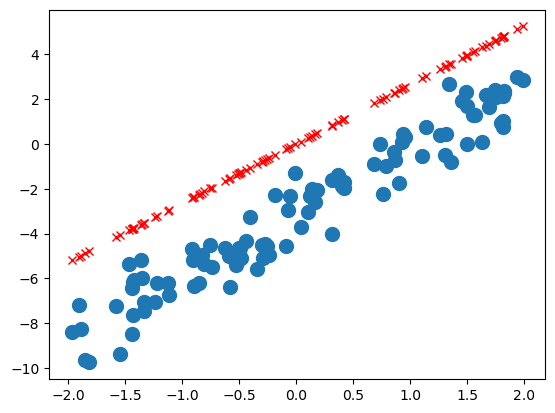

In [6]:
# Plot des predictions
plt.plot(x, y, 'o', markersize=10)
plt.plot(x, beta * x, 'rx')

## Construire un multi-layer perceptron (MLP)

Ici, les données sont $y = a x^2 + b$

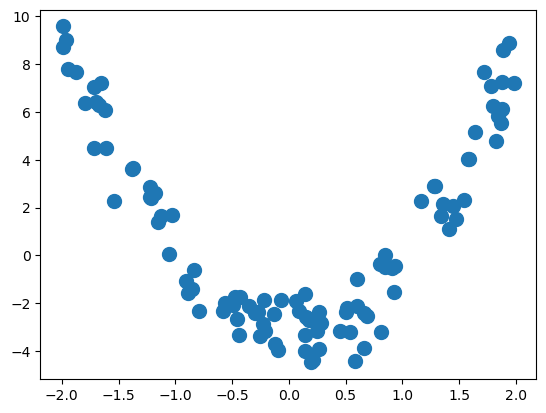

In [7]:
n = 100
   
a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * (x ** 2) + b_star + noise

x = torch.tensor(x, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

Nous allons construire un Pytorch modèle. Dans ce framework, on définit la fonction "forward" qui prend en argument les inputs et retourne les prédictions.

A l'aide de torch.nn.Module et de différentes layers (torch.nn.Linear, torch.nn.ReLU), terminez la classe ci-dessous pour créer un multi-layers perceptron 

In [8]:
class MLP(torch.nn.Module):
    def __init__(self, input_size):
        super().__init__()
        prev_size = input_size

        self.layer = torch.nn.Sequential(
            torch.nn.Linear(input_size, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 1),
        )

    def forward(self, X):
        X = self.layer(X)
        
        return X

En utilisant le travail précédent, faite une cellule utilisant un torch optimizer pour optimiser le MLP 

In [9]:
y = torch.tensor(y, dtype=torch.float32)
model = MLP(1)

optim = torch.optim.Adam(model.parameters(), lr=0.01)

n_epochs = 10000

In [10]:
for epoch in range(n_epochs):
    optim.zero_grad()           # Reset the gradients
    loss = loss_f(model(x), y)  # Calculate the Loss
    loss.backward()             # Update the gradients
    optim.step()                # Optimize beta

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item()}')

Epoch [100/10000], Loss: 0.8412600159645081
Epoch [200/10000], Loss: 0.8268487453460693
Epoch [300/10000], Loss: 0.8202043175697327
Epoch [400/10000], Loss: 0.8160255551338196
Epoch [500/10000], Loss: 0.8126305341720581
Epoch [600/10000], Loss: 0.8098053932189941
Epoch [700/10000], Loss: 0.808093249797821
Epoch [800/10000], Loss: 0.8050622344017029
Epoch [900/10000], Loss: 0.8004679679870605
Epoch [1000/10000], Loss: 0.7978874444961548
Epoch [1100/10000], Loss: 0.7949598431587219
Epoch [1200/10000], Loss: 0.7945302724838257
Epoch [1300/10000], Loss: 0.7901080846786499
Epoch [1400/10000], Loss: 0.7923007011413574
Epoch [1500/10000], Loss: 0.7838162779808044
Epoch [1600/10000], Loss: 0.7815559506416321
Epoch [1700/10000], Loss: 0.7785703539848328
Epoch [1800/10000], Loss: 0.7825968861579895
Epoch [1900/10000], Loss: 0.7808631658554077
Epoch [2000/10000], Loss: 0.7781059145927429
Epoch [2100/10000], Loss: 0.7707679867744446
Epoch [2200/10000], Loss: 0.7751195430755615
Epoch [2300/10000], 

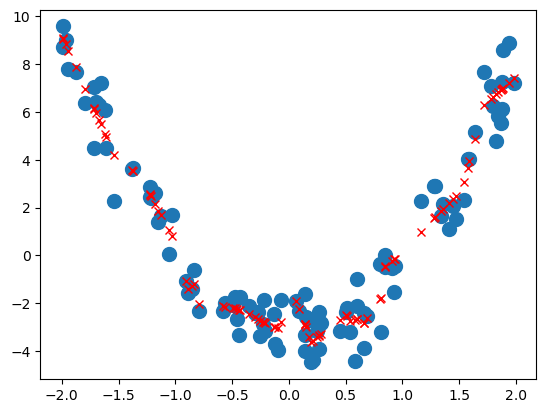

In [11]:
# Plot des predictions
plt.plot(x, y, 'o', markersize=10)
plt.plot(x, model(x).detach().numpy(), 'rx')

## Construire un Recurrent Neural Network (RNN) from scratch

### Données
 
Téléchargez [ici](https://download.pytorch.org/tutorial/data.zip) un jeu de données "nom" -> pays d'origine du nom.
Les noms de chaque pays sont dans leur fichier texte "[country].txt"

A partir de ces données, créez X la liste des noms et y le pays d'origine de chaque nom

### Aide pour générer les données

A la fin de ce code, on lit les noms et leur pays d'origine.<br>
On a une fonction randomTrainingExample, qui génère le pays d'origine et le nom (en texte), puis l'ID de ce pays et le tenseur représetant le nom. <br>

A partir de là, vous pouvez générer les données X, y comme vous voulez

In [12]:
# Code pour générer le jeu de données
# En admettant que les fichiers ont été extraits dans data/raw/names/

import math
import numpy as np
from pathlib import Path
import random
import string
import time
import unicodedata

path = Path("../data/raw/names/")

In [13]:
def read_names(path):
    category_lines = {}
    for file in path.iterdir():
        if not file.name.endswith(".txt"):
            continue
            
        with open(file, encoding="utf-8") as f:
            names = [unicodeToAscii(line.strip()) for line in f]
        
        category = file.stem
        category_lines[category] = names

    return category_lines

# Handling ASCII stuff
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [14]:
category_lines = read_names(path)
all_categories = list(category_lines.keys())
n_categories = len(all_categories)

In [15]:
# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [16]:
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Japanese / line = Hiraoka
category = Spanish / line = Porra
category = Japanese / line = Kawasie
category = English / line = Rowson
category = German / line = Schroter
category = Scottish / line = Gordon
category = Chinese / line = Zheng
category = Spanish / line = Tomas
category = German / line = Lafrentz
category = Scottish / line = Jackson


### Construire le RNN

Un Recurrent Neural Network prend, pour prédire un input X et un hidden state H.<br>
Il output une prédiction et un nouvel hidden state pour la prochaine étape.<br>
Nous allons construire un modèle:

$f(name, H_0) = (proba(\mbox{name from country 0}), proba(\mbox{name from country 1}), \dots)$

Avec $H_0$ un hidden state initial (qui sera appris).

Pour l'instant, nous allons construire un RNN linéaire.<br>
Comme pour le MLP, construisez un torch.nn.Module:
- A l'init, la classe prendra les arguments input_size, hidden_state_dim, output_size
- L'init déclare un paramètre pour l'hidden state initial $H_0$, une layer linéaire prenant (input, hidden_state) -> output_size
- Le forward fonctionnera ainsi:
    - hidden_state = $H_0$
    - For letter in name:
        - x = one-hot encode (letter)
        - output, hidden_state = linear_layer(x, hidden_state)
    - return softmax(output)


In [17]:
class LinearRNN(torch.nn.Module):
    def __init__(self, input_size, hidden_state_dim, output_size):
        super(LinearRNN, self).__init__()

        self.hidden_state_dim = hidden_state_dim
        self.hidden_state = self.initHidden()

        self.H0 = torch.nn.Parameter(self.hidden_state, requires_grad=True)
        self.linear_layer = torch.nn.Linear(input_size + hidden_state_dim, output_size)
        self.softmax = torch.nn.LogSoftmax(dim=1)

    def forward(self, name):
        hidden_state = self.H0
        for letter in name:
            combined = torch.cat((letterToTensor(letter), hidden_state), 1)
            hidden_state = self.linear_layer(combined)
            output = hidden_state
        return self.softmax(output)

    def initHidden(self):
        return torch.zeros(1, self.hidden_state_dim)

In [18]:
n_hidden = 18

model = LinearRNN(n_letters, n_hidden, n_categories)

name = 'Albert'

#output, next_hidden = model(input)
output = model(name)
print(output)

tensor([[-2.9348, -2.7140, -2.7840, -2.9440, -2.6879, -3.1119, -2.9648, -2.9524,
         -2.9521, -2.7527, -2.9272, -2.9421, -2.9675, -2.7291, -2.7774, -2.9980,
         -3.0934, -2.9300]], grad_fn=<LogSoftmaxBackward0>)


In [19]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('English', 4)


A l'aide de la negative log likelihood (torch.nn.NLLLoss), construisez une boucle optimisant ce modèle (optimizer, itération au sein des examples).

**Attention 1:** Ici, on n'a pas des tenseurs X, y. On va prendre les exemples 1 par 1.<br>
**Attention 2:** Si le modèle apprend les examples dans l'ordre (d'abord tous les noms arabes, puis tous les chinois, puis tous les tchèques, etc), cela changera grandement le résulat (et le modèle sera très mauvais)

In [20]:
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

In [21]:
epochs = 1000000
print_every = 1000

current_loss = 0
all_losses = []
losses = []

In [22]:
for iter in range(epochs):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    optimizer.zero_grad()
    output = model(line)
    loss = criterion(output, category_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    current_loss += loss
    
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('Epoch: {}/{}............. Loss: {:.4f} | {} / {} {}'.format(iter, n_epochs, np.mean(losses), line, guess, correct))
        all_losses.append(np.mean(losses))
        losses = []

Epoch: 0/10000............. Loss: 2.8788 | Mustafa / Chinese ✗ (Arabic)
Epoch: 1000/10000............. Loss: 2.8593 | Tsogas / Greek ✓
Epoch: 2000/10000............. Loss: 2.7747 | Kouches / Dutch ✗ (Greek)
Epoch: 3000/10000............. Loss: 2.5864 | Demetrious / Greek ✓
Epoch: 4000/10000............. Loss: 2.4354 | Eliopoulos / Greek ✓
Epoch: 5000/10000............. Loss: 2.3188 | Suk / Chinese ✗ (Korean)
Epoch: 6000/10000............. Loss: 2.2842 | Tannous / French ✗ (Arabic)
Epoch: 7000/10000............. Loss: 2.2015 | Giblin / Russian ✗ (English)
Epoch: 8000/10000............. Loss: 2.1990 | De la cruz / Spanish ✓
Epoch: 9000/10000............. Loss: 2.1443 | Re / Chinese ✗ (Italian)
Epoch: 10000/10000............. Loss: 2.1059 | Cui / Korean ✗ (Chinese)
Epoch: 11000/10000............. Loss: 2.0474 | Ryom / Vietnamese ✗ (Korean)
Epoch: 12000/10000............. Loss: 2.0694 | Drago / Portuguese ✗ (Italian)
Epoch: 13000/10000............. Loss: 2.0039 | Hino / Chinese ✗ (Japanese

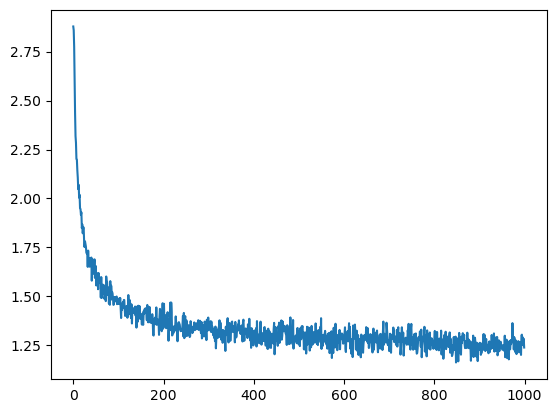

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(all_losses)

## Utilisez les RNNs de Pytorch

Sur le même jeu de données, nous allons utiliser les RNNs déjà codés par Pytorch.<br>

### Padding

Nous voulons aussi utiliser des tenseurs X et y pour utiliser data loader pour les batchs, etc


Avec du padding, créer un tenseur X de la taille (nb_data, name_max_length, vocab_size). <br>
X[i, j, :] contient le one-hot encode de la j-ème lettre du i-ème prénom. Si le i-ème prénom a moins de j lettre, alors X[i, j, :] est un vecteur nul

### Modèle

Construisez un modèle qui:
- A l'init, déclare un hidden state initial $H_0$, un RNN (avec torch.nn.RNN)
- Au forward, passe (input, $H_0$) dans le RNN, puis applique un softmax à l'output

Entraînez le modèle avec des batchs de X, y

### Amélioration du modèle

Tenter d'améliorer le modèle:
- En utilisant plusieurs layers dans le RNN
- En utilisant LSTM à la place de RNN (une autre forme de recurrent neural network, plus avancé)

(regardez la doc)

### Embedding

On veut utiliser en embedding pour les lettres.
Le forward appliquerait l'embedding aux lettres, puis les layers RNN prendrait l'embedding comme input

Nous allons utiliser torch.nn.Embedding
**Attention**: Embedding ne prend pas les lettres one-hot encoded, mais leurs indices.
Par exemple, "abca", il lui faudrait le vecteur [0, 1, 2, 0]<br>
et non [[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]]

**Expérimenter torch.nn.Embedding**<br>
Instantier "emb" une torch.nn.Embedding avec les bons paramètres (regardez la doc)
En construisant le bon tenseur X_emb,

```emb(X_emb)```

doit retourner un tenseur (qui n'a pas de sens car il n'a rien appris pour l'instant, mais les opérations se passent bien)

Construisez un modèle RNN, où les lettres passent par l'embedding avant d'être envoyées dans les couches de RNN.
Construisez une loop d'apprentissage

Expérimentez plusieurs valeurs pour le nombre de couche, la taille d'embedding ou les tailles d'hidden state.<br>
Quel neg log likelihood obtenez-vous ?